### Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string 
from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.metrics import precision_recall_curve, auc
from wordcloud import WordCloud 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

### Step 2: Load the dataset

In [2]:
data = pd.read_csv('amazon.csv')
data.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [3]:
data.columns

Index(['reviewText', 'Positive'], dtype='object')

In [4]:
data.shape

(20000, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [6]:
data.isnull().sum()

reviewText    0
Positive      0
dtype: int64

In [7]:
#Note: There are no missing values in our dataframe.

### Step 3:Clean the text data by removing stop words, punctuation and performing stemming/lemmatization.

#### Handle stop words & punctuation:

In [8]:
text_column = 'reviewText'
label_column = 'Positive'
english_stopwords = set(stopwords.words('english'))
english_punctuation = string.punctuation

In [9]:
def preprocess_text(text): 
    # Remove punctuation
    remove_punc = [char for char in text if char not in english_punctuation]
    clean_text = ''.join(remove_punc) # char joining

    #Remove stopwords
    words = clean_text.split()
    text = ([word for word in words if word.lower() not in english_stopwords])
    return text

In [10]:
data[text_column] = data[text_column].apply(preprocess_text) 

In [11]:
data[text_column] 

0        [one, best, apps, acording, bunch, people, agr...
1        [pretty, good, version, game, free, LOTS, diff...
2        [really, cool, game, bunch, levels, find, gold...
3        [silly, game, frustrating, lots, fun, definite...
4        [terrific, game, pad, Hrs, fun, grandkids, lov...
                               ...                        
19995    [app, fricken, stupidit, froze, kindle, wont, ...
19996    [Please, add, need, neighbors, Ginger1016, tha...
19997    [love, game, awesome, wish, free, stuff, house...
19998    [love, love, love, app, side, fashion, story, ...
19999    [game, rip, list, things, MAKE, BETTERbull, Fi...
Name: reviewText, Length: 20000, dtype: object

In [12]:
data[text_column][0]

['one',
 'best',
 'apps',
 'acording',
 'bunch',
 'people',
 'agree',
 'bombs',
 'eggs',
 'pigs',
 'TNT',
 'king',
 'pigs',
 'realustic',
 'stuff']

#### Lemmatization:

In [13]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [14]:
data[text_column] 

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch level find golden egg s...
3        silly game frustrating lot fun definitely reco...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbor Ginger1016 thanks bun...
19997    love game awesome wish free stuff house didnt ...
19998    love love love app side fashion story fight wo...
19999    game rip list thing MAKE BETTERbull First NEED...
Name: reviewText, Length: 20000, dtype: object

In [15]:
data[text_column][0]

'one best apps acording bunch people agree bomb egg pig TNT king pig realustic stuff'

### Step 4:Tokenize the comments.

In [16]:
#for tokenize dataframe I use word_tokenizer
def tokenize_text(text):
    return word_tokenize(text)

data[text_column] = data[text_column].apply(tokenize_text)

In [17]:
data[text_column] 

0        [one, best, apps, acording, bunch, people, agr...
1        [pretty, good, version, game, free, LOTS, diff...
2        [really, cool, game, bunch, level, find, golde...
3        [silly, game, frustrating, lot, fun, definitel...
4        [terrific, game, pad, Hrs, fun, grandkids, lov...
                               ...                        
19995    [app, fricken, stupidit, froze, kindle, wont, ...
19996    [Please, add, need, neighbor, Ginger1016, than...
19997    [love, game, awesome, wish, free, stuff, house...
19998    [love, love, love, app, side, fashion, story, ...
19999    [game, rip, list, thing, MAKE, BETTERbull, Fir...
Name: reviewText, Length: 20000, dtype: object

In [18]:
data[text_column][0]

['one',
 'best',
 'apps',
 'acording',
 'bunch',
 'people',
 'agree',
 'bomb',
 'egg',
 'pig',
 'TNT',
 'king',
 'pig',
 'realustic',
 'stuff']

#### Lemmatization:

In [19]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [20]:
data[text_column] 

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch level find golden egg s...
3        silly game frustrating lot fun definitely reco...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbor Ginger1016 thanks bun...
19997    love game awesome wish free stuff house didnt ...
19998    love love love app side fashion story fight wo...
19999    game rip list thing MAKE BETTERbull First NEED...
Name: reviewText, Length: 20000, dtype: object

In [21]:
data[text_column][0]

'one best apps acording bunch people agree bomb egg pig TNT king pig realustic stuff'

### Step 5:Convert the text data into a numerical format using TF-IDF or word embeddings.

In [22]:
#I use TF-IDF
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [23]:
np.array(x)

array(<20000x22609 sparse matrix of type '<class 'numpy.float64'>'
	with 310998 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [24]:
cv_df = pd.DataFrame(x.toarray(), index=data[text_column], columns=vectorizer.get_feature_names_out())

In [25]:
cv_df

,00,000,000000,007,01302013,02,025cent,04042011,05,051414,...,zoology,zoom,zoomed,zooming,zpg,zumocast,zz,zzz,zzzz,zzzzz
reviewText,,,,,,,,,,,,,,,,,,,,,
one best apps acording bunch people agree bomb egg pig TNT king pig realustic stuff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pretty good version game free LOTS different level play kid enjoy lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
really cool game bunch level find golden egg super fun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
silly game frustrating lot fun definitely recommend fun time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
terrific game pad Hrs fun grandkids love Great entertainment waiting long line,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
app fricken stupidit froze kindle wont allow place iteams ignore 5 people wrong many level people made game excidently press wrong button money jer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Please add need neighbor Ginger1016 thanks bunch awesome game much fun lot like farmville FB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
love game awesome wish free stuff house didnt cost much fun fun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 6:Split the dataset into training (80%) and testing (20%) sets.

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)

In [27]:
xtrain.shape, ytrain.shape

((16000, 22609), (16000,))

In [28]:
xtest.shape, ytest.shape

((4000, 22609), (4000,))

### Step 7:Select at least three different machine learning models for comparison-
- 1.Logistic Regression
- 2.Naive Bayes
- 3.Support Vector Machine (SVM)
- 4.Random Forest


#### 1. Apply Logistic Regression Model-

Before applying Logistic Regression Model to my dataset, I apply hyperparameter tuning XGBoost Classifier to balance imbalanced data in my dataframe.

#### XGBoost Classifier:

In [29]:
import xgboost 
from xgboost import XGBClassifier

In [30]:
xgb_1 = XGBClassifier()

In [31]:
x_1train, x_1test, y_1train, y_1test = train_test_split(x, y, test_size=0.2, random_state=40)

In [32]:
xgb_1.fit(x_1train, y_1train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Logistic Regression Model-

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
#from sklearn.linear_model import LogisticRegression
L_reg = LogisticRegression().fit(x_1train,y_1train)
L_reg

LogisticRegression()

In [35]:
L_reg.coef_

array([[-0.15486826, -0.24559891,  0.14639173, ...,  0.02990808,
         0.184685  ,  0.184685  ]])

In [36]:
L_reg.intercept_

array([0.71169583])

In [37]:
L_reg.predict(x_1test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
np.array(y_1test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Evaluate Logistic Regression Model-

In [39]:
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix,RocCurveDisplay
from termcolor import colored

In [40]:
train_accuracy_1 = L_reg.score(x_1train,y_1train)
test_accuracy_1 = L_reg.score(x_1test, y_1test)
accuracy_score_1 = accuracy_score(y_1test, L_reg.predict(x_1test))
precision_score_1 = precision_score(y_1test, L_reg.predict(x_1test))
recall_score_1 = recall_score(y_1test, L_reg.predict(x_1test))
f1_score_1 = f1_score(y_1test, L_reg.predict(x_1test))
cm_1 = confusion_matrix(y_1test, L_reg.predict(x_1test))

print(colored('Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_1,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_1,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_1,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_1,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_1,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_1,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_1}',color='light_yellow'))

Model Evaluation:

train_accuracy : 0.92
test_accuracy : 0.89
accuracy_score : 0.89
precision_score : 0.9
recall_score : 0.97
f1_score : 0.93

confusion_matrix :
 [[ 606  326]
 [ 107 2961]]


##### Heatmap:

<Axes: >

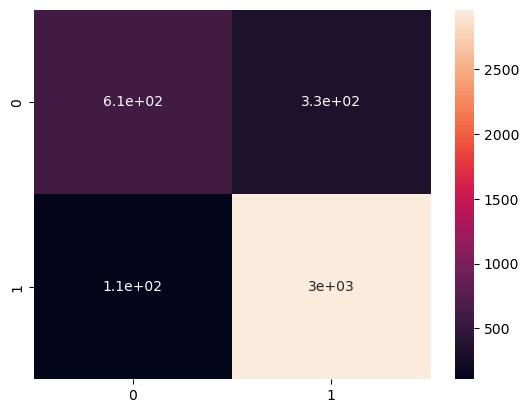

In [41]:
sns.heatmap(cm_1, annot=True)

##### RocCurve visualization:

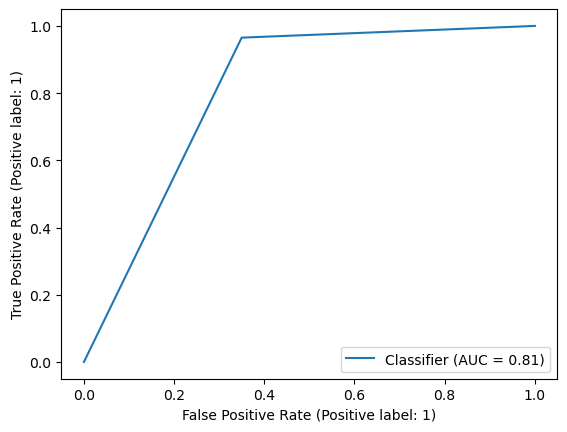

In [42]:
RocCurveDisplay.from_predictions(y_1test, L_reg.predict(x_1test))
#plt.plot([0,1],[0,1])
plt.show()

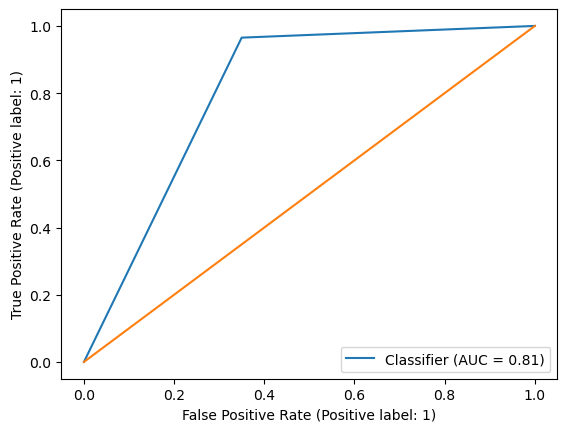

In [43]:
RocCurveDisplay.from_predictions(y_1test, L_reg.predict(x_1test))
plt.plot([0,1],[0,1])
plt.show()

### 2. Apply Naive Bayes Model-

Before applying Naive Bayes Model to my dataset, I apply hyperparameter tuning XGBoost Classifier to balance imbalanced data in my dataframe.

#### XGBoost Classifier:

In [44]:
xgb_2 = XGBClassifier()

In [45]:
x_2train, x_2test, y_2train, y_2test = train_test_split(x, y, test_size=0.2, random_state=45)

In [46]:
xgb_2.fit(x_2train, y_2train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Multinomial Naive Bayes Model-

In [47]:
#Here, I apply Multinomial Naive Bayes Model for prediction.

MNB_model = MultinomialNB()
MNB_model.fit(x_2train, y_2train)

MultinomialNB()

In [48]:
MNB_model.predict(x_2test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
np.array(y_2test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Evaluate Multinomial Naive Bayes Model-

In [50]:
x_2train.shape,y_2train.shape

((16000, 22609), (16000,))

In [51]:
x_2test.shape,y_2test.shape

((4000, 22609), (4000,))

In [52]:
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix,RocCurveDisplay

In [53]:
train_accuracy_2 = MNB_model.score(x_2train,y_2train)
test_accuracy_2 = MNB_model.score(x_2test, y_2test)
accuracy_score_2 = accuracy_score(y_2test, MNB_model.predict(x_2test))
precision_score_2 = precision_score(y_2test, MNB_model.predict(x_2test))
recall_score_2 = recall_score(y_2test, MNB_model.predict(x_2test))
f1_score_2 = f1_score(y_2test, MNB_model.predict(x_2test))
cm_2 = confusion_matrix(y_2test, MNB_model.predict(x_2test))

print(colored('Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy_2 : {round(train_accuracy_2,2)}',color='light_magenta'))
print(colored(f'test_accuracy_2 : {round(test_accuracy_2,2)}',color='light_magenta'))
print(colored(f'accuracy_score_2 : {round(accuracy_score_2,2)}',color='light_magenta'))
print(colored(f'precision_score_2 : {round(precision_score_2,2)}',color='light_magenta'))
print(colored(f'recall_score_2 : {round(recall_score_2,2)}',color='light_magenta'))
print(colored(f'f1_score_2 : {round(f1_score_2,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix_2 :\n {cm_2}',color='light_yellow'))

Model Evaluation:

train_accuracy_2 : 0.82
test_accuracy_2 : 0.79
accuracy_score_2 : 0.79
precision_score_2 : 0.78
recall_score_2 : 1.0
f1_score_2 : 0.88

confusion_matrix_2 :
 [[ 128  832]
 [   9 3031]]


##### Heatmap:

<Axes: >

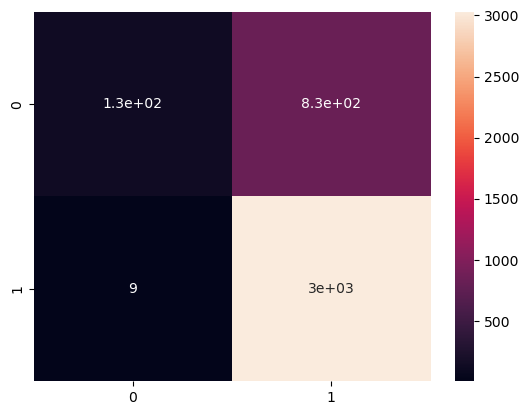

In [54]:
sns.heatmap(cm_2, annot=True)

##### RocCurve visualization:

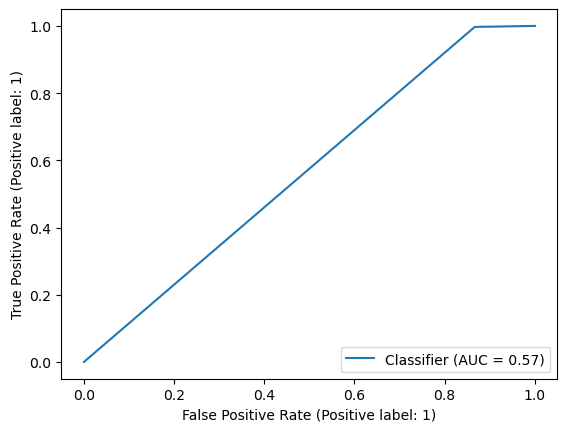

In [55]:
RocCurveDisplay.from_predictions(y_2test, MNB_model.predict(x_2test))
#plt.plot([0,1],[0,1])
plt.show()

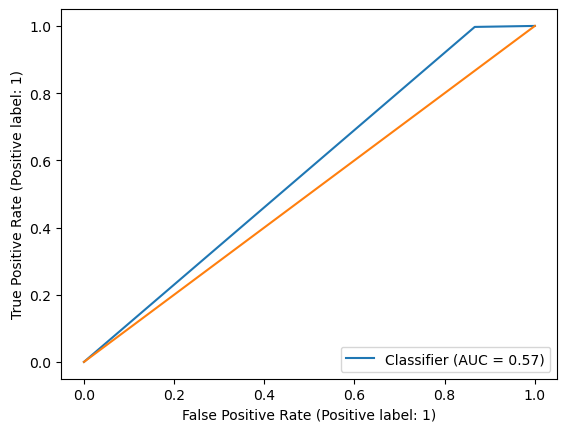

In [56]:
RocCurveDisplay.from_predictions(y_2test, MNB_model.predict(x_2test))
plt.plot([0,1],[0,1])
plt.show()

### 3. Apply Random Forest Model-

Before applying Random Forest model to my dataset, I apply hyperparameter tuning XGBoost Classifier to balance imbalanced data in my dataframe.

#### XGBoost Classifier:

In [57]:
xgb_3 = XGBClassifier()

In [58]:
x_3train, x_3test, y_3train, y_3test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
xgb_3.fit(x_3train, y_3train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Random Forest Classifier:

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [62]:
rf_clf.fit(x_3train, y_3train)

RandomForestClassifier(random_state=42)

In [63]:
rf_clf.predict(x_3test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
np.array(y_3test)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

#### Evaluate Random Forest Classifier Model-

In [65]:
x_3train.shape,y_3train.shape

((16000, 22609), (16000,))

In [66]:
x_3test.shape,y_3test.shape

((4000, 22609), (4000,))

In [67]:
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix,RocCurveDisplay

In [68]:
train_accuracy_3 = rf_clf.score(x_3train,y_3train)
test_accuracy_3 = rf_clf.score(x_3test, y_3test)
accuracy_score_3 = accuracy_score(y_3test, rf_clf.predict(x_3test))
precision_score_3 = precision_score(y_3test, rf_clf.predict(x_3test))
recall_score_3 = recall_score(y_3test, rf_clf.predict(x_3test))
f1_score_3 = f1_score(y_3test, rf_clf.predict(x_3test))
cm_3 = confusion_matrix(y_3test, rf_clf.predict(x_3test))

print(colored('Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy_2 : {round(train_accuracy_3,2)}',color='light_magenta'))
print(colored(f'test_accuracy_2 : {round(test_accuracy_3,2)}',color='light_magenta'))
print(colored(f'accuracy_score_2 : {round(accuracy_score_3,2)}',color='light_magenta'))
print(colored(f'precision_score_2 : {round(precision_score_3,2)}',color='light_magenta'))
print(colored(f'recall_score_2 : {round(recall_score_3,2)}',color='light_magenta'))
print(colored(f'f1_score_2 : {round(f1_score_3,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix_2 :\n {cm_3}',color='light_yellow'))

Model Evaluation:

train_accuracy_2 : 1.0
test_accuracy_2 : 0.87
accuracy_score_2 : 0.87
precision_score_2 : 0.86
recall_score_2 : 0.98
f1_score_2 : 0.92

confusion_matrix_2 :
 [[ 491  467]
 [  69 2973]]


##### Heatmap:

<Axes: >

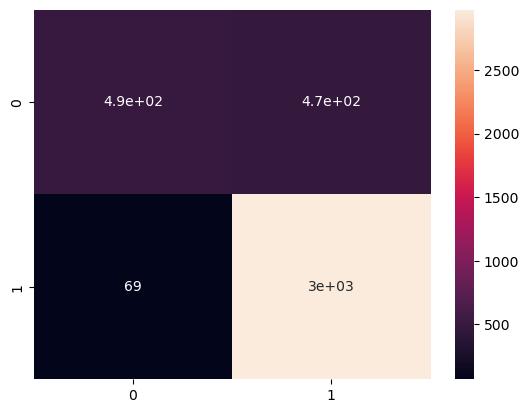

In [69]:
sns.heatmap(cm_3, annot=True)

##### RocCurve visualization:

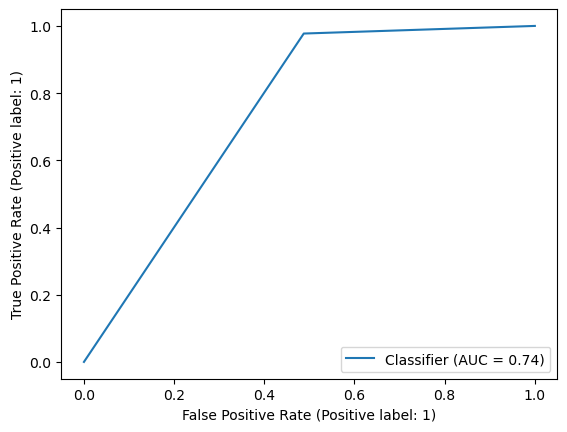

In [70]:
RocCurveDisplay.from_predictions(y_3test, rf_clf.predict(x_3test))
#plt.plot([0,1],[0,1])
plt.show()

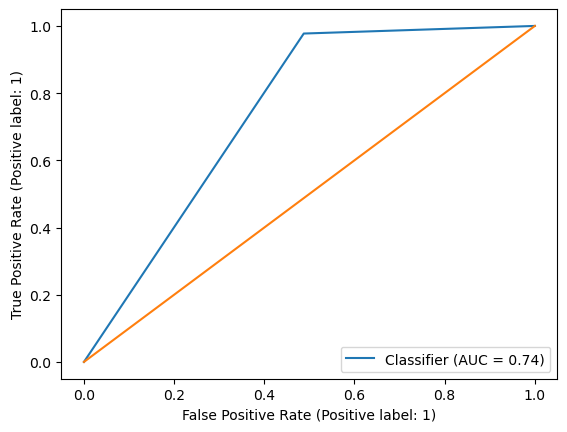

In [71]:
RocCurveDisplay.from_predictions(y_3test, rf_clf.predict(x_3test))
plt.plot([0,1],[0,1])
plt.show()

### Step 8:Performance Visualization-

#### 1. Visualize performance with table-

In [72]:
d = {
    'model' : ['Logistic Regression','Naive Bayes', 'Random Forest'],  
    'train accuracy': [train_accuracy_1,train_accuracy_2,train_accuracy_3],
    'test accuracy': [test_accuracy_1,test_accuracy_2,test_accuracy_3],
    'accuracy score': [accuracy_score_1,accuracy_score_2,accuracy_score_3],
    'precision score': [precision_score_1,precision_score_2,precision_score_3],
    'recall score': [recall_score_1,recall_score_2,recall_score_3],
    'f1_score': [f1_score_1,f1_score_2,f1_score_3],  
}


d = pd.DataFrame(d)

d['train accuracy'] = d['train accuracy'].round(2)
d['test accuracy'] = d['test accuracy'].round(2)
d['accuracy score'] = d['accuracy score'].round(2)
d['precision score'] = d['precision score'].round(2)
d['recall score'] = d['recall score'].round(2)
d['f1_score'] = d['f1_score'].round(2)

d

,model,train accuracy,test accuracy,accuracy score,precision score,recall score,f1_score
0,Logistic Regression,0.92,0.89,0.89,0.90,0.97,0.93
1,Naive Bayes,0.82,0.79,0.79,0.78,1.00,0.88
2,Random Forest,1.00,0.87,0.87,0.86,0.98,0.92


#### 2. Visualize performance with histogram-

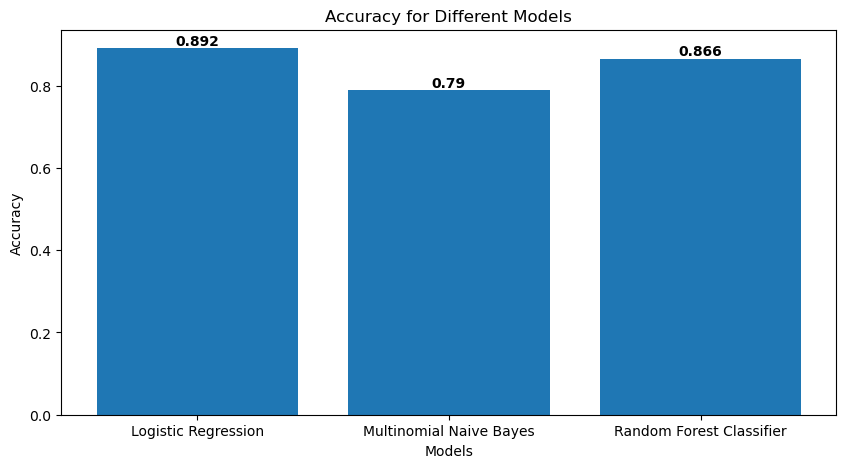

In [73]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [accuracy_score_1, accuracy_score_2, accuracy_score_3]
model_names = ['Logistic Regression', 'Multinomial Naive Bayes', 'Random Forest Classifier']
plot_histogram(accuracy_values, model_names, 'Accuracy')


### Step 9:Conclusion-

Comparing Logistic Regression, Multinomial Naive Bayes, Random Forest Classifier model, I see Logistic Regression gives the best result with highest 89.2% accuracy, 90% precision, 97% recall, 93% f1_score. 